In [128]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt


k=1.265569250534297
import scipy.constants as ct
from pylab import * 


In [129]:
p1=pd.read_csv("p1.csv",sep=';',decimal=',')
p2=pd.read_csv("d2.csv",sep=';',decimal=',',na_filter=True,skip_blank_lines=True)
p3=pd.read_csv("d3.csv",sep=';',decimal=',',na_filter=True,skip_blank_lines=True)
p3=p3.dropna()
p2=p2.dropna()


Força cs corrent

In [130]:
p1.head()

,M,uM,I,uI,Unnamed: 4,Unnamed: 5
0,5.4,0.100000,2.6250,0.072572,NaN,NaN
1,9.4,0.100000,3.7500,0.067577,NaN,NaN
2,14.5,0.141421,4.3875,0.028137,NaN,NaN
3,20.4,0.100000,5.3350,0.045461,NaN,NaN
4,24.4,0.141421,5.9575,0.078262,NaN,NaN


In [139]:
M=p1["M"]/(10**6)
uM=p1["uM"]/(10**6)
I=p1["I"]
uI=p1["uI"]
F=M*ct.g
uF=np.sqrt((uM*ct.g)**2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     465.3
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           0.000218
Time:                        21:31:02   Log-Likelihood:                -6.0594
No. Observations:                   5   AIC:                             16.12
Df Residuals:                       3   BIC:                             15.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7747      1.106     -0.700      0.5

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



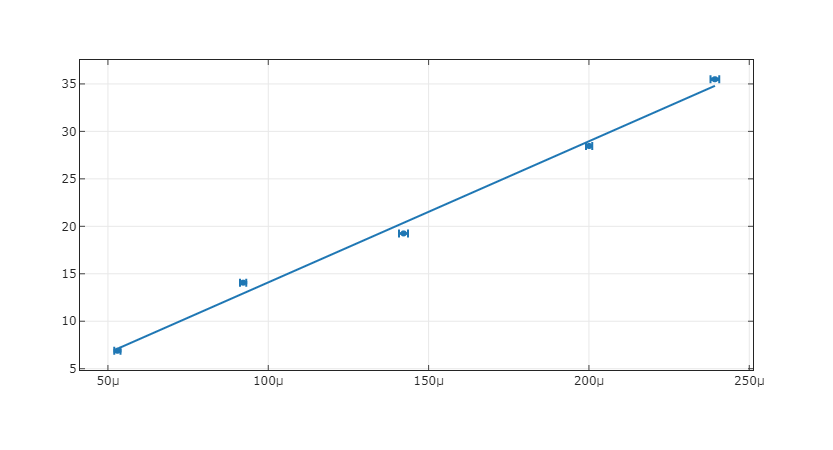

1.1224212021864915e-06 1.4806436722789596e-07


In [150]:
fig1=px.scatter(x=F,y=I**2,template='simple_white',trendline="ols",error_x=uF,error_y=uI)
   
fig1.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig1.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True

                )
fig1.update_layout(
xaxis_title=r'$F\text{ (}\mu\text{N)}$',
yaxis_title=r'$I\text{ (A)}^2$'
)
fig1.write_image("P1.pdf",engine="kaleido")
results = px.get_trendline_results(fig1)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fit_results = px.get_trendline_results(fig1).px_fit_results.iloc[0]
fig1.show()
m=fit_results.params[1]
um=fit_results.bse[1]
fig1.write_image("FI2.pdf",engine="kaleido")
r=8.1/1000
ur=1/1000
L=30.5/100
uL=1/1000
mu0=2*pi*r/(m*L)
umu0=np.sqrt((ur*2*np.pi/(m*L))**2+(um*2*np.pi*r/(m**2*L))**2+(uL*(2*np.pi*r)/(m*L**2))**2)
print(mu0,umu0)

Força vs separació

In [83]:
p2=p2.drop(0)
p2

,M,uM,G,uG
1,5.4,0.100000,13.5,1.224745
2,9.4,0.100000,23.5,2.345208
3,14.8,0.141421,39.5,3.674235
4,20.4,0.100000,58.5,2.345208
5,25.8,0.141421,74.0,1.732051


In [206]:
M1=p2["M"]/(10**6)
uM1=p2["uM"]/(10**6)
A1=p2["G"]
uA1=p2["uG"]
F1=M1*ct.g
uF1=np.sqrt((uM1*ct.g)**2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2129.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.32e-06
Time:                        22:55:17   Log-Likelihood:                 67.862
No. Observations:                   6   AIC:                            -131.7
Df Residuals:                       4   BIC:                            -132.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.327e-05   3.45e-06      3.843      0.0

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



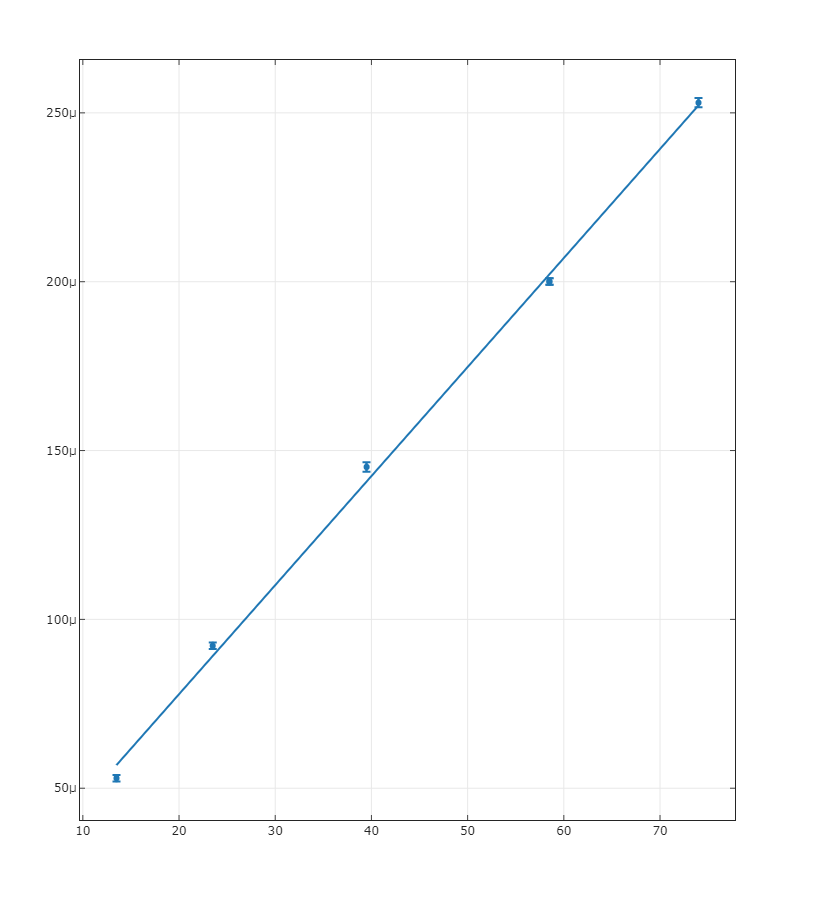

In [207]:
fig1=px.scatter(x=A1,y=F1,template='simple_white',trendline="ols",error_x=uF1,error_y=uF1)
   
fig1.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig1.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True

                )
fig1.update_layout(
yaxis_title=r'$F\text{ (}\mu\text{N )}$',
xaxis_title=r'$\text{Angle (º)}$'
)
fig1.write_image("P1.pdf",engine="kaleido")
results1 = px.get_trendline_results(fig1)
results1= results1.iloc[0]["px_fit_results"].summary()
print(results1)
fit_results1 = px.get_trendline_results(fig1).px_fit_results.iloc[0]
fig1.show()
m1=fit_results1.params[1]
um1=fit_results1.bse[1]
kk=m1
ukk=um1
fig1.write_image("AF.pdf",engine="kaleido")


In [255]:
p3=pd.read_csv("d3.csv",sep=';',decimal=',',na_filter=True,skip_blank_lines=True)
p3=p3.dropna()
# p3=p3.drop([3])
p3

,V,u,D,uD
0,10,1,55,1
1,8,1,57,1
2,6,1,73,1
3,4,1,98,1
4,2,1,114,1


In [220]:



V=p3["V"]/1000
uV=p3["u"]/1000
A=p3["D"]
uA=p3["uD"]

D1=1/(V+3.1/1000)
# D1=V
uD1=np.sqrt(uV**2*(1/(V+3.1/1000)**2)**2)
uF=np.sqrt((uA*k)**2+(uk*A)**2)

# k=m1/4
F=A*kk


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     61.11
Date:                Fri, 04 Jun 2021   Prob (F-statistic):            0.00436
Time:                        21:55:53   Log-Likelihood:                 48.065
No. Observations:                   5   AIC:                            -92.13
Df Residuals:                       3   BIC:                            -92.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.64e-05   2.84e-05      1.632      0.2

/opt/conda/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



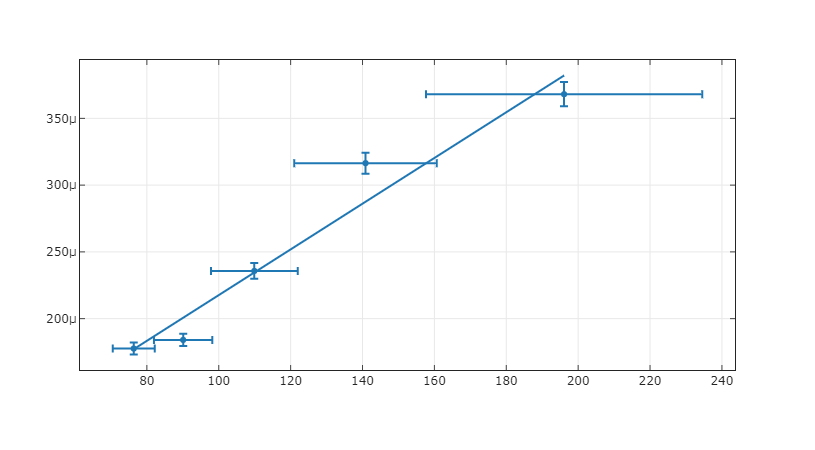

In [225]:
fig1=px.scatter(x=D1,y=F,template='simple_white',trendline="ols",error_x=uD1,error_y=uF)
   
fig1.update_xaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True
                )
fig1.update_yaxes(ticks="inside",
                mirror='ticks',showline=True,showgrid=True

                )
fig1.update_layout(
xaxis_title=r'$1/r\text{ (m}^{-1}\text{)}$',
yaxis_title=r'$\text{Força (}\mu\text{N)}$'
)
fig1.write_image("DF.pdf",engine="kaleido")
results = px.get_trendline_results(fig1)
results = results.iloc[0]["px_fit_results"].summary()
print(results)
fit_results = px.get_trendline_results(fig1).px_fit_results.iloc[0]
fig1.show()
m=fit_results.params[1]
um=fit_results.bse[1]
fig1.write_image("F1R.pdf",engine="kaleido")


In [222]:
I=5.39
uI=0.01
L=30.5/100
uL=0.01
mu0=m*2*np.pi/(I**2*L)
umu0=np.sqrt((um*2*np.pi/(I**2*L))**2+(uI*6*m*np.pi/(I**3*L))**2+(uL*2*m*np.pi/(I**2*L**2))**2)
print(mu0,umu0)

1.2140516372781419e-06 1.6046444521982707e-07


In [227]:
p3

,V,u,D,uD
0,10,1,55,1
1,8,1,57,1
2,6,1,73,1
3,4,1,98,1
4,2,1,114,1


In [246]:
p4=pd.read_csv("p4.csv",sep=';',decimal=',',na_filter=True,skip_blank_lines=True)
# p3=p3.dropna()
# p3=p3.drop([3])
p4

,I,uI,D,uD
0,5.99,0.01,14,1
1,6.52,0.01,9,1
2,6.48,0.01,11,1
3,5.43,0.01,9,1
4,5.98,0.01,10,1


In [261]:
B=np.empty(len(p4["I"]))
uB=np.empty(len(p4["I"]))
F=np.empty(len(p4["I"]))
for i in range(len(p4["I"])):
#     print(i)
    B[i]=kk*p4.at[i,"D"]/(p4.at[i,"I"]*L)
    uB[i]=np.sqrt(ukk**2*(p4.at[i,"D"]/(p4.at[i,"I"]*L))**2+p4.at[i,"uD"]**2*(kk/(p4.at[i,"I"]*L))**2+p4.at[i,"uI"]**2*(kk*p4.at[i,"D"]/(p4.at[i,"I"]**2*L))**2+uL**2*(kk*p4.at[i,"D"]/(p4.at[i,"I"]*L**2))**2)
    F[i]=kk*p4.at[i,"D"]
print('B:',B)
print('uB:',uB)

B: [2.47444607e-05 1.46140871e-05 1.79719192e-05 1.75476700e-05
 1.77041710e-05]
uB: [2.01776272e-06 1.72251864e-06 1.78016764e-06 2.06836861e-06
 1.90246909e-06]


In [258]:
k

8.108608274991857e-07